**FLOOD FILL ALGORITHM**

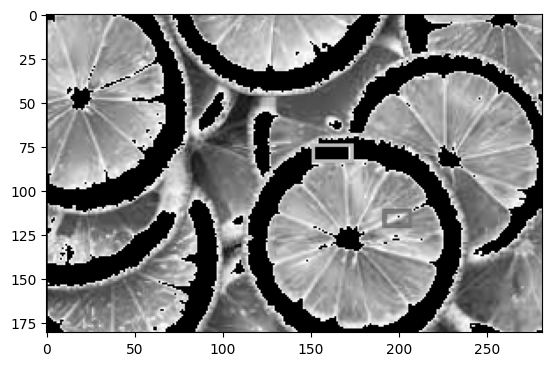

In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)] # 8 conneted neighbours

def is_pixel_valid(x, y, image, visited):
    return 0 <= x < image.shape[0] and 0 <= y < image.shape[1] and not visited[x, y]

def depth_first_search(image, x, y, visited, region, brightness_threshold=200):
    stack = [(x, y)]
    while stack:
        current_x, current_y = stack.pop()
        if is_pixel_valid(current_x, current_y, image, visited):
            visited[current_x, current_y] = True
            if image[current_x, current_y] > brightness_threshold:
                region.append((current_x, current_y))
                for direction_x, direction_y in directions:
                    stack.append((current_x + direction_x, current_y + direction_y))

def remove_hotspots(image, brightness_threshold=200, fill_value=0):
    visited = np.zeros_like(image, dtype=bool)
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] > brightness_threshold and not visited[x, y]:
                region = []
                depth_first_search(image, x, y, visited, region, brightness_threshold)
                for region_x, region_y in region:
                    image[region_x, region_y] = fill_value
    
    return image

image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
processed_image = remove_hotspots(image)


result_image = Image.fromarray(processed_image)
plt.imshow(result_image, cmap="gray")
plt.show()


**FLOOD FILL WITH AREA CONTROL**

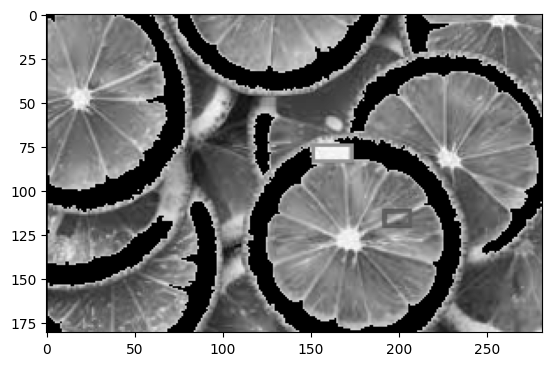

In [2]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

def is_valid(x, y, image, visited):
    return 0 <= x < image.shape[0] and 0 <= y < image.shape[1] and not visited[x, y]

def dfs(image, x, y, visited, region, threshold=200):
    stack = [(x, y)]
    while stack:
        cx, cy = stack.pop()
        if is_valid(cx, cy, image, visited):
            visited[cx, cy] = True
            if image[cx, cy] > threshold:
                region.append((cx, cy))
                for dx, dy in directions:
                    stack.append((cx + dx, cy + dy))

def flood_fill(image, min_area=200, threshold=210, fill_value=0):
    visited = np.zeros_like(image, dtype=bool)
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] > threshold and not visited[x, y]:
                region = []
                dfs(image, x, y, visited, region, threshold)
                if len(region) >= min_area:
                    for rx, ry in region:
                        image[rx, ry] = fill_value
                        
    result_img = Image.fromarray(image)
    return image

image = cv2.imread("image.jpg",cv2.IMREAD_GRAYSCALE)
flood_filled_image = flood_fill(image)
result_img = Image.fromarray(flood_filled_image)
plt.imshow(result_img,cmap="gray")
